# <p style="padding:20px;background-color:#FFDEAD;margin:0;color:(0,0,0);font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">Application of Machine Learning Models to predict Company Bankruptcy</p>

Dữ liệu được thu thập từ **Taiwan Economic Journal** trong các năm 1999 đến 2009. Công ty phá sản được xác định dựa trên các quy định kinh doanh của Sở giao dịch chứng khoán Đài Loan (Taiwan Stock Exchange). Nguồn dữ liệu được thu thập từ: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

Phá sản hoặc thất bại trong kinh doanh có thể có tác động tiêu cực đến cả bản thân doanh nghiệp và nền kinh tế toàn cầu. Những người hành nghề kinh doanh, nhà đầu tư, chính phủ và các nhà nghiên cứu học thuật từ lâu đã nghiên cứu các cách để xác định rủi ro thất bại trong kinh doanh nhằm giảm thiệt hại kinh tế do phá sản.

Tóm lại, dự đoán phá sản là một nhiệm vụ rất quan trọng đối với nhiều tổ chức tài chính liên quan. Nói chung, mục đích là để dự đoán khả năng một công ty có thể phá sản. Các tổ chức tài chính đang cần các mô hình dự đoán hiệu quả để đưa ra các quyết định cho vay phù hợp.

<a class="anchor" id="0.1"></a>
### Table of Contents
+ [**1. Load data**](#1)
    + [1.1 Import the libraries](#1.1)
    + [1.2 Load the dataset](#1.2)
+ [**2. Exploratory Data Analysis**](#2)
    + [2.1 Understanding dataset](#2.1)
    + [2.2 Data Cleaning](#2.2)
+ [**3. EDA and Visualization**](#3)
    + [3.1 Feature Selection](#3.1)
    + [3.2 Data Visualization](#3.2)
    + [3.3 Imbalanced Data](#3.3)
    + [3.4 Splitting and training](#3.4)
+ [**4. Model building**](#4)
    + [4.1 Logisitc Regression](#4.1)
    + [4.2 Naive Bayes](#4.2)
    + [4.3 KNN](#4.3)
    + [4.4 Decision Tree](#4.4)
    + [4.5 Random Forest](#4.5)
    + [4.6 SVM](#4.6)
    + [4.7 XG Boost](#4.7)
    + [4.8 CatBoost](#4.8)
    + [4.9 ANN](#4.9)
+ [**5. Result**](#5)

+ [**6. Conclusions**](#6)


<a class="anchor" id="1"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">1. LOAD DATA</p>
[**Table of Contents**](#0.1)

### 1.1 Import the libraries <a class="anchor" id="1.1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load the dataset <a class="anchor" id="1.2"></a>

In [2]:
data = pd.read_csv("data.csv")
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
# 5 dòng đầu
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
# 5 dòng cuối
data.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


<a class="anchor" id="2"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">2. EXPLORATORY DATA ANALYSIS</p>
[**Table of Contents**](#0.1)

### 2.1 Understanding dataset <a class="anchor" id="2.1"></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**Nhận xét:** 
+ Kết quả trên cho ta biết về thông tin cơ bản của các thành phần trong dataset. 
+ Ngoài ra, tên cột target thừa kí hiệu `?`, do đó cần loại bỏ kí hiệu này cho tên cột phù hợp.

In [6]:
data.rename(columns = {'Bankrupt?':'Bankrupt'}, inplace = True)
data.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


**Nhận xét:** Như vậy, tên target đã được đổi lại cho phù hợp.

In [7]:
data.shape

(6819, 96)

**Nhận xét:** Dataset có **6819** dòng và **96** cột (bao gồm cả cột target là Bankrupt?)

In [8]:
data.isnull().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

**Nhận xét:** Không có cột nào có chứa giá trị null.

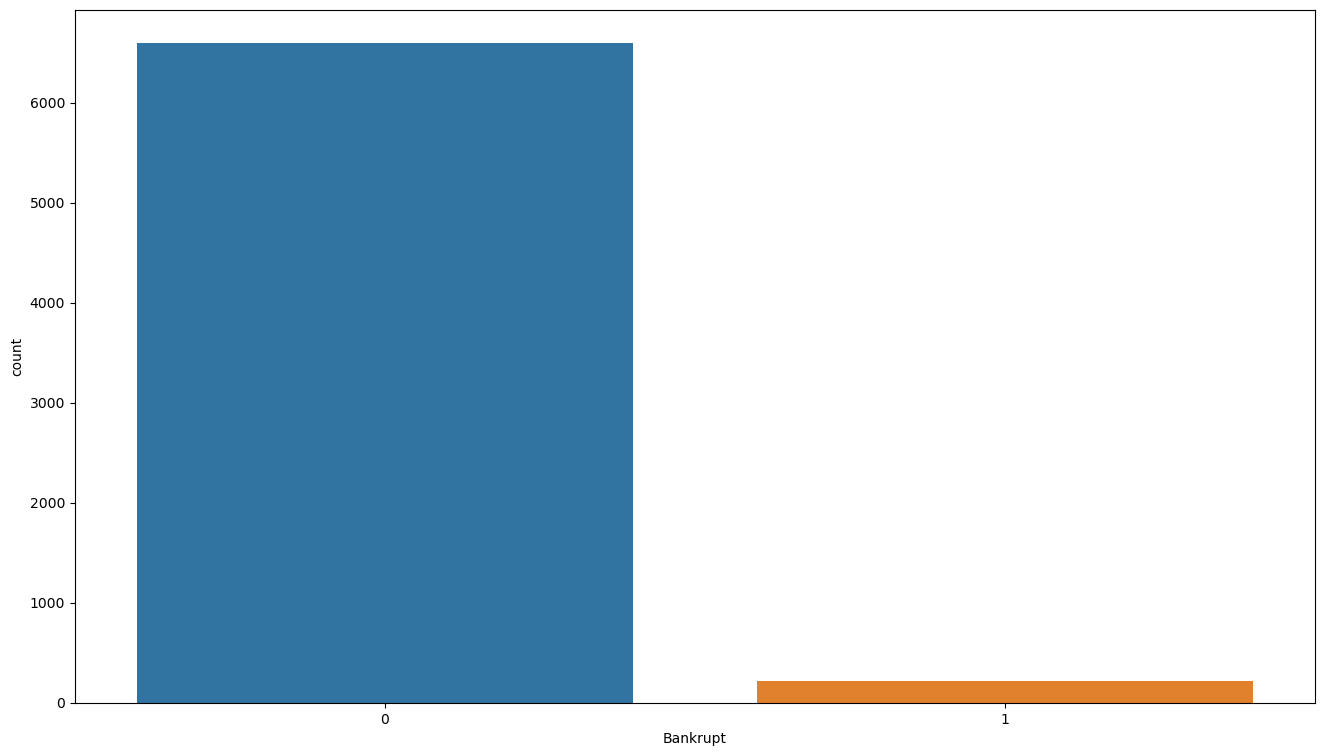

0    6599
1     220
Name: Bankrupt, dtype: int64


In [9]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt', data = data)
plt.show()
print(data['Bankrupt'].value_counts())

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


**Nhận xét tổng quan về dataset:**
+ Dataset gồm có 6819 dòng và 96 cột.
+ Không có giá trị null trong dữ liệu.
+ Bankrupt: không phá sản (0 = 6599) và phá sản (1 = 220).
+ Data Bankrupt là dạng **Imbalanced**.

### 2.2 Data Cleaning <a class="anchor" id="2.2"></a>

In [11]:
# Check if there are any duplicate rows
# data.duplicated(keep=False).sum()

In [12]:
# Xử lý dữ liệu ngoại lệ


In [13]:
# Xem dữ liệu bị thiếu
# data.isnull().values.sum() # check missing values

<a class="anchor" id="3"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">3. EDA AND VISUALIZATION</p>

[**Table of Contents**](#0.1)

### 3.1 Feature Selection <a class="anchor" id="3.1"></a>

In [14]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

In [15]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

### Determine Mutual Information

In [16]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([3.05596384e-02, 3.44377154e-02, 2.93439934e-02, 1.66488314e-02,
       1.72963721e-02, 2.00303763e-02, 3.06371410e-02, 2.80586035e-02,
       3.18589644e-02, 3.63483118e-02, 0.00000000e+00, 0.00000000e+00,
       1.45407064e-02, 8.17033374e-05, 2.21925055e-02, 3.15366485e-02,
       3.06286611e-02, 2.84189036e-02, 4.11741808e-02, 6.33391066e-03,
       2.14076594e-03, 2.19094972e-02, 4.42875047e-02, 9.29043921e-03,
       6.53169700e-03, 1.21183898e-02, 9.83220070e-03, 1.09367349e-02,
       1.33422739e-02, 4.52840545e-03, 1.22752470e-02, 1.63291498e-03,
       2.43473527e-02, 2.76514948e-02, 3.45801390e-02, 3.22221297e-02,
       3.44530982e-02, 3.49884265e-02, 1.05907173e-02, 3.94973342e-02,
       7.43085346e-03, 2.49700117e-02, 4.35097987e-02, 4.84952656e-03,
       9.20611255e-03, 3.62985384e-03, 8.89303426e-04, 2.54222753e-03,
       3.23934439e-03, 0.00000000e+00, 0.00000000e+00, 2.37517377e-02,
       1.01318764e-02, 2.65019169e-02, 5.76041803e-03, 7.12647241e-04,
      

### Feature Importance

Text(0, 0.5, 'Mutual Information')

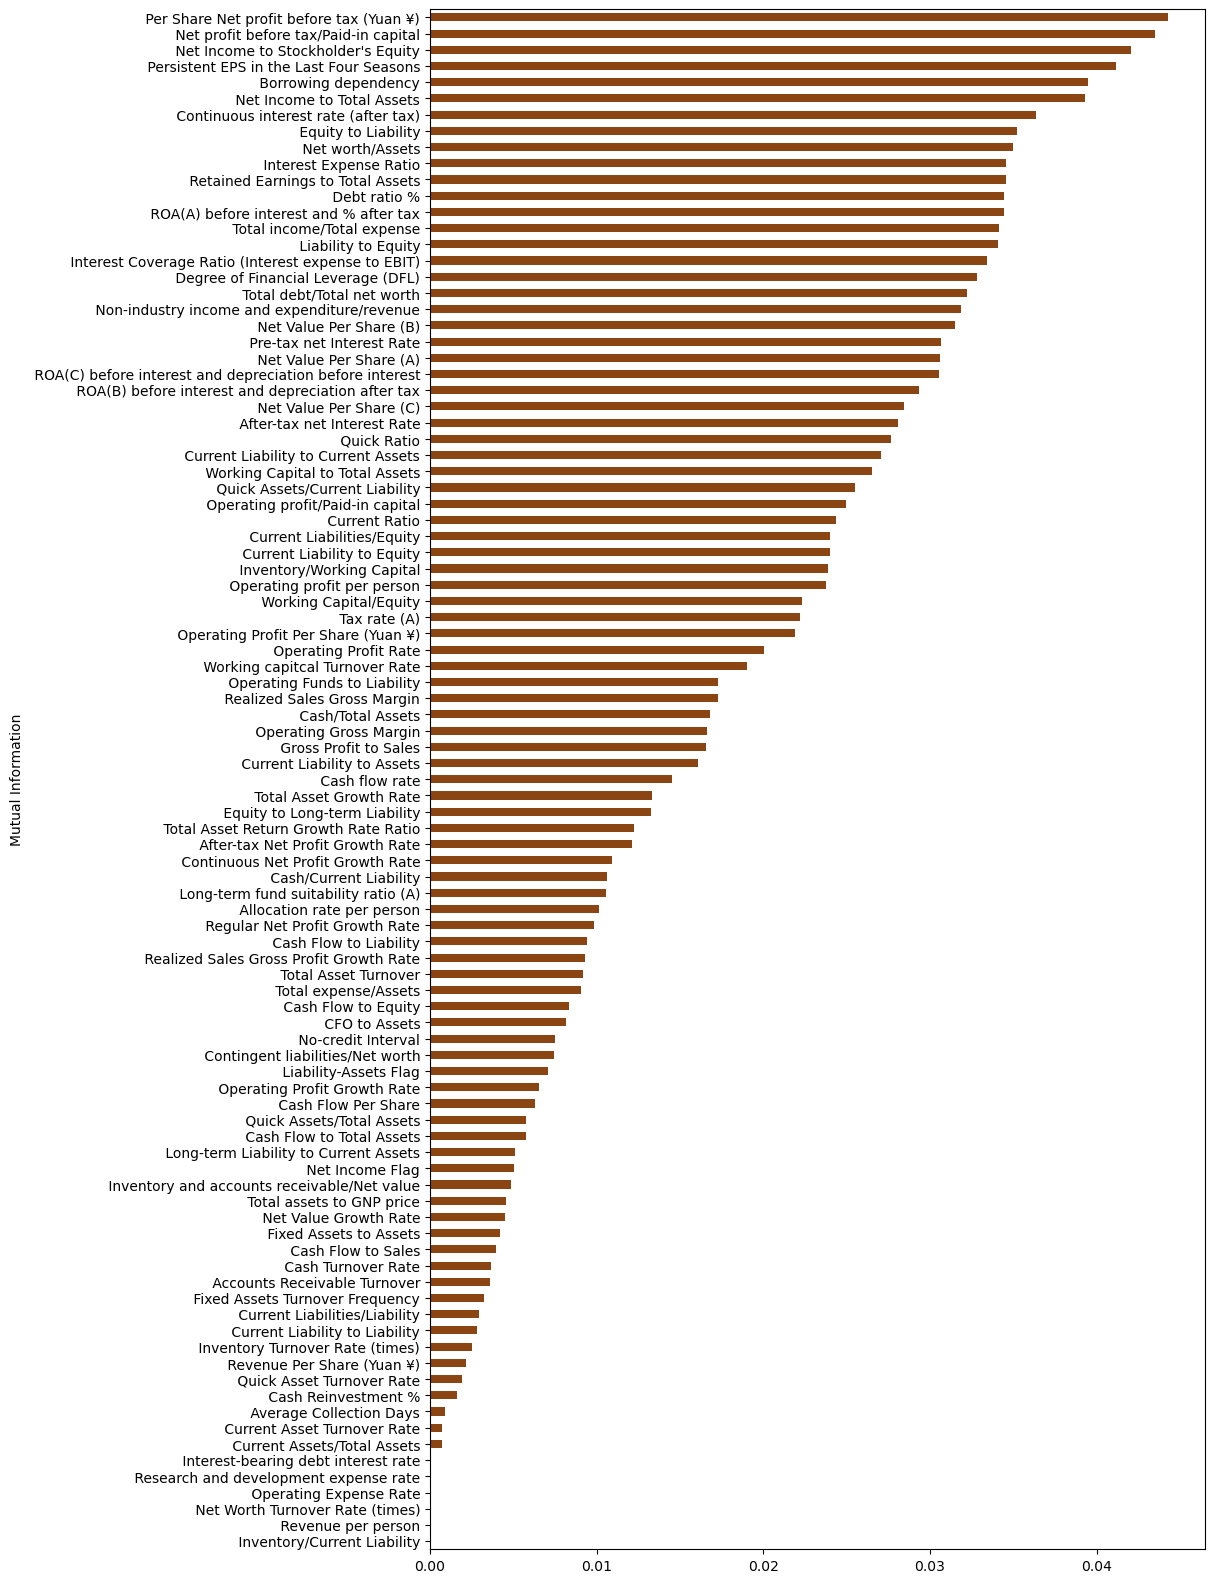

In [17]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=True).plot.barh(figsize=(10, 20), color = '#8B4513')
plt.ylabel('Mutual Information')

**Nhận xét:**
+ Thứ tự các feature có ảnh hưởng đến **Bankrupt** được sort từ cao đến thấp.
+ 10 features có tác động lớn gồm:
    + Continuous interest rate (after tax),
    + Persistent EPS in the Last Four Seasons
    + Per Share Net profit before tax (Yuan ¥)
    + Debt ratio %
    + Net worth/Assets
    + Borrowing dependency
    + Net profit before tax/Paid-in capital
    + Net Income to Total Assets
    + Net Income to Stockholder's Equity
    + Equity to Liability
    + ...

### Select top k features based on MI

In [18]:
# here we will select the top 10 features
# based on their mutual information value

# select features
top_features = SelectKBest(mutual_info_classif, k=10) # k = 10
sel_ = top_features.fit(X_train, y_train) 

# display features
X_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 3.2 Data Visualization <a class="anchor" id="3.2"></a>

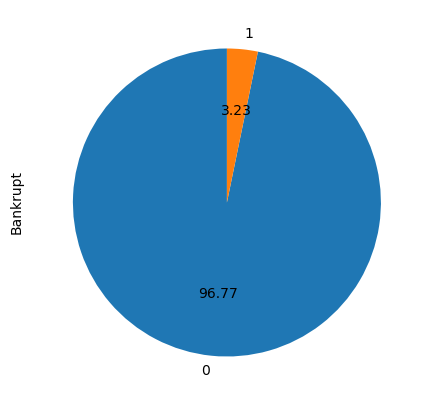

In [20]:
plt.figure(figsize=(5, 5))
data['Bankrupt'].value_counts().plot(kind='pie', autopct="%.2f", startangle = 90)
plt.show();

**Nhận xét:**
+ Bankrupt với type = 1 chiếm 3.23%.
+ Bankrupt với type = 0 chiếm 96.77%.

### 3.3 Imbalanced Data <a class="anchor" id="3.3"></a>

In [21]:
# Using SMOTE method to over sample the data
x, y = data.drop('Bankrupt',axis=1),data['Bankrupt']
x.shape, y.shape

((6819, 95), (6819,))

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)

In [23]:
x.shape,y.shape

((13198, 95), (13198,))

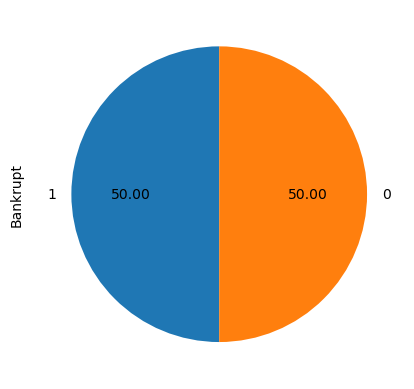

In [24]:
y.value_counts().plot(kind='pie',autopct="%.2f", startangle = 90)
plt.show()

**Nhận xét:** Sau khi điều chỉnh, dữ liệu trở thành dạng Balance.

### 3.4 Splitting and training <a class="anchor" id="3.4"></a>

In [25]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

In [26]:
# to remove the rest of the features:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [27]:
X_train.shape, X_test.shape

((4773, 10), (2046, 10))

<a class="anchor" id="4"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">4. MODEL BUILDING</p>

[**Table of Contents**](#0.1)

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

### 4.1 Logistic Regression <a class="anchor" id="4.1"></a>

**Training the Logistic Regression on the Training set**

In [30]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)

In [31]:
# Train Score
train_score = LR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9673


**Testing the Logistic Regression on the Testing set**

In [32]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.0508
Precision score: 0.7500
F1-Score: 0.0952
Accuracy score: 0.9721


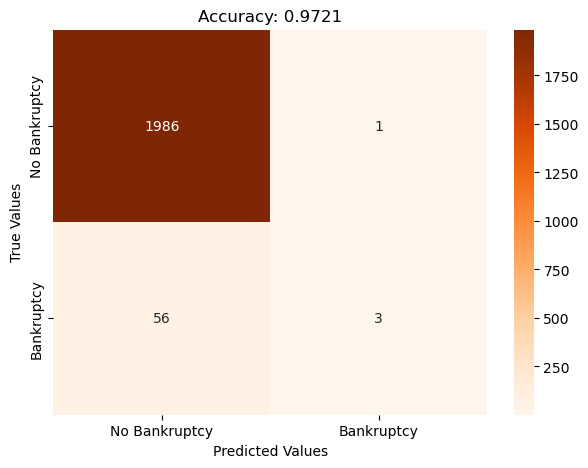



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1987
           1       0.75      0.05      0.10        59

    accuracy                           0.97      2046
   macro avg       0.86      0.53      0.54      2046
weighted avg       0.97      0.97      0.96      2046



In [33]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9673**.
+ Score của tập Test là **0.9721**.
+ Model có độ chính xác rất cao (**auc = 0.9721**).

### 4.2 Naive Bayes <a class="anchor" id="4.2"></a>

**Training the Naive Bayes on the Training set**

In [34]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
acc2 = accuracy_score(y_test, y_pred)

In [35]:
# Train Score
train_score = NB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9491


**Testing the Naive Bayes on the Testing set**

In [36]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.5424
Precision score: 0.3333
F1-Score: 0.4129
Accuracy score: 0.9555


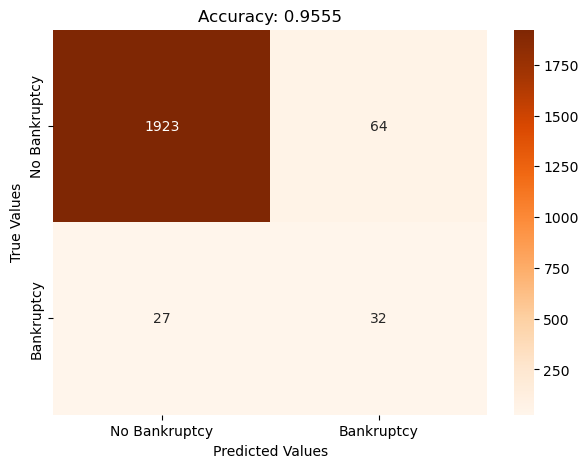



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1987
           1       0.33      0.54      0.41        59

    accuracy                           0.96      2046
   macro avg       0.66      0.76      0.69      2046
weighted avg       0.97      0.96      0.96      2046



In [37]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9491**.
+ Score của tập Test là **0.9555**.

### 4.3 KNN <a class="anchor" id="4.3"></a>

**Training the K-NN model on the Training set**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
acc3 = accuracy_score(y_test, y_pred)

In [39]:
# Train Score
train_score = KNN_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9736


**Testing the KNN on the Testing set**

In [40]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.1525
Precision score: 0.2571
F1-Score: 0.1915
Accuracy score: 0.9629


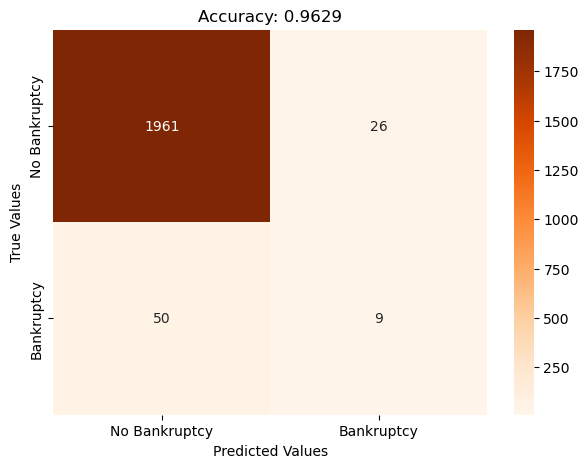



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.26      0.15      0.19        59

    accuracy                           0.96      2046
   macro avg       0.62      0.57      0.59      2046
weighted avg       0.95      0.96      0.96      2046



In [41]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9736**.
+ Score của tập Test là **0.9629**.

### 4.4 Decision Tree <a class="anchor" id="4.4"></a>

**Training Decision Tree Classification on Train set**

In [42]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)
y_pred = DTR_model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred)

In [43]:
# Train Score
train_score = DTR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


**Testing Decision Tree Classification on the Testing set**

In [44]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.3390
Precision score: 0.2273
F1-Score: 0.2721
Accuracy score: 0.9477


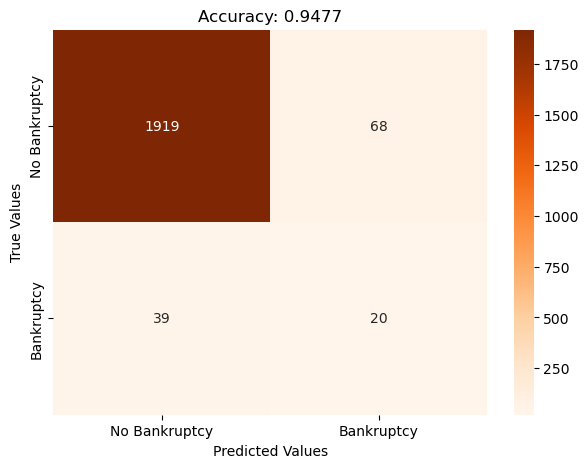



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1987
           1       0.23      0.34      0.27        59

    accuracy                           0.95      2046
   macro avg       0.60      0.65      0.62      2046
weighted avg       0.96      0.95      0.95      2046



In [45]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **1.0000**.
+ Score của tập Test là **0.9477**.

### 4.5 Random Forest <a class="anchor" id="4.5"></a>

**Training the Random Forest Classification model on the Training set**

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)

In [47]:
# Train Score
train_score = RF_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9948


**Testing the Random Forest Classification model on the Testing set**

In [48]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.1525
Precision score: 0.3913
F1-Score: 0.2195
Accuracy score: 0.9687


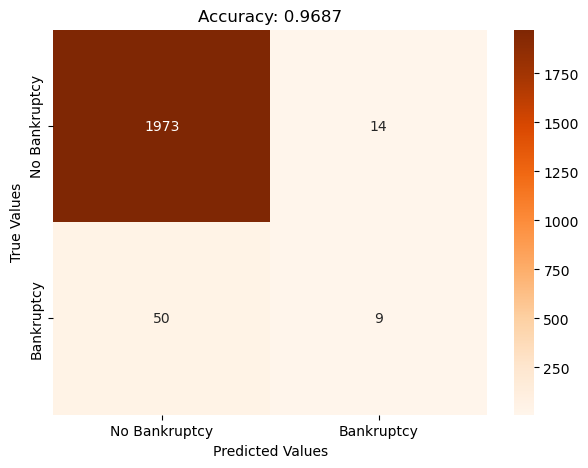



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.39      0.15      0.22        59

    accuracy                           0.97      2046
   macro avg       0.68      0.57      0.60      2046
weighted avg       0.96      0.97      0.96      2046



In [49]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9948**.
+ Score của tập Test là **0.9687**.

### 4.6 SVM <a class="anchor" id="4.6"></a>

**Training the SVM on the Training set**

In [50]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
acc6 = accuracy_score(y_test, y_pred)

In [51]:
# Train Score
train_score = SVM_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9663


**Testing the SVM model on the Testing set**

In [52]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.0000
Precision score: 0.0000
F1-Score: 0.0000
Accuracy score: 0.9712


/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


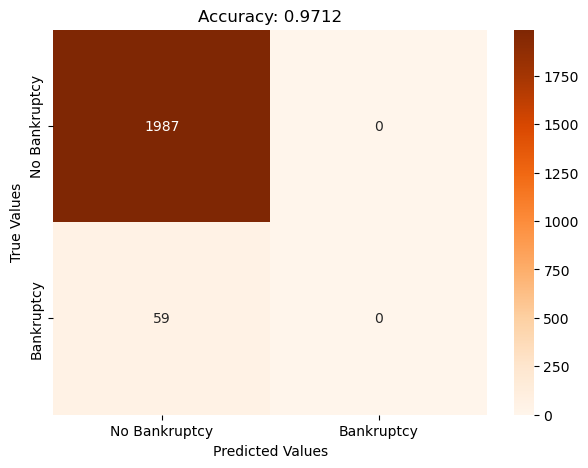



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1987
           1       0.00      0.00      0.00        59

    accuracy                           0.97      2046
   macro avg       0.49      0.50      0.49      2046
weighted avg       0.94      0.97      0.96      2046



/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9663**.
+ Score của tập Test là **0.9712**.

### 4.7 XGBoost <a class="anchor" id="4.7"></a>

**Training the XGBoost model on the Training set**

In [54]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
acc7 = accuracy_score(y_test, y_pred)

In [55]:
# Train Score
train_score = XGB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


**Testing the XGBoost model on the Testing set**

In [56]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.1864
Precision score: 0.3667
F1-Score: 0.2472
Accuracy score: 0.9673


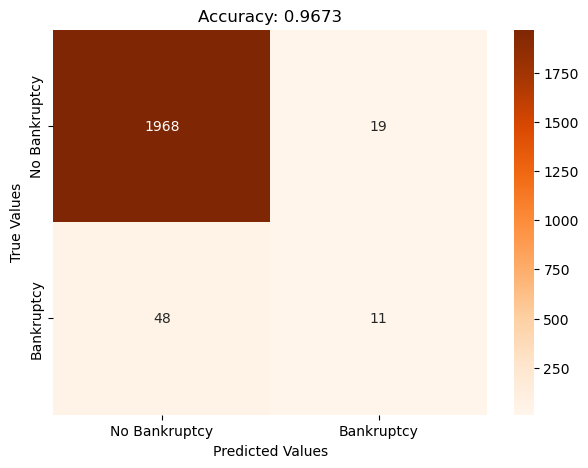



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.37      0.19      0.25        59

    accuracy                           0.97      2046
   macro avg       0.67      0.59      0.62      2046
weighted avg       0.96      0.97      0.96      2046



In [57]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **1.0000**.
+ Score của tập Test là **0.9673**.

### 4.8 CatBoost <a class="anchor" id="4.8"></a>

**Training CatBoost on the Training set**

In [58]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
acc8 = accuracy_score(y_test, y_pred)

Learning rate set to 0.020081
0:	learn: 0.6496940	total: 59.1ms	remaining: 59s
1:	learn: 0.6044917	total: 61ms	remaining: 30.4s
2:	learn: 0.5622949	total: 62.7ms	remaining: 20.8s
3:	learn: 0.5240697	total: 64.7ms	remaining: 16.1s
4:	learn: 0.4912042	total: 66.6ms	remaining: 13.2s
5:	learn: 0.4607658	total: 68.2ms	remaining: 11.3s
6:	learn: 0.4335125	total: 69.9ms	remaining: 9.91s
7:	learn: 0.4062433	total: 71.8ms	remaining: 8.9s
8:	learn: 0.3815688	total: 74.2ms	remaining: 8.17s
9:	learn: 0.3606458	total: 76.3ms	remaining: 7.56s
10:	learn: 0.3419576	total: 78.1ms	remaining: 7.02s
11:	learn: 0.3231987	total: 79.8ms	remaining: 6.57s
12:	learn: 0.3048751	total: 81.7ms	remaining: 6.2s
13:	learn: 0.2898899	total: 87ms	remaining: 6.13s
14:	learn: 0.2752150	total: 88.8ms	remaining: 5.83s
15:	learn: 0.2622368	total: 91.3ms	remaining: 5.62s
16:	learn: 0.2507579	total: 92.8ms	remaining: 5.37s
17:	learn: 0.2385694	total: 95.2ms	remaining: 5.19s
18:	learn: 0.2290020	total: 96.9ms	remaining: 5s
19:

166:	learn: 0.0739476	total: 438ms	remaining: 2.19s
167:	learn: 0.0738464	total: 440ms	remaining: 2.18s
168:	learn: 0.0737413	total: 443ms	remaining: 2.18s
169:	learn: 0.0735876	total: 446ms	remaining: 2.17s
170:	learn: 0.0734753	total: 448ms	remaining: 2.17s
171:	learn: 0.0733533	total: 450ms	remaining: 2.16s
172:	learn: 0.0733001	total: 451ms	remaining: 2.16s
173:	learn: 0.0732520	total: 453ms	remaining: 2.15s
174:	learn: 0.0732129	total: 456ms	remaining: 2.15s
175:	learn: 0.0730943	total: 457ms	remaining: 2.14s
176:	learn: 0.0730212	total: 460ms	remaining: 2.14s
177:	learn: 0.0729275	total: 462ms	remaining: 2.13s
178:	learn: 0.0728225	total: 464ms	remaining: 2.13s
179:	learn: 0.0727124	total: 466ms	remaining: 2.12s
180:	learn: 0.0725458	total: 468ms	remaining: 2.12s
181:	learn: 0.0724966	total: 469ms	remaining: 2.11s
182:	learn: 0.0723902	total: 472ms	remaining: 2.1s
183:	learn: 0.0722729	total: 474ms	remaining: 2.1s
184:	learn: 0.0721812	total: 476ms	remaining: 2.1s
185:	learn: 0.0

329:	learn: 0.0612735	total: 833ms	remaining: 1.69s
330:	learn: 0.0611994	total: 835ms	remaining: 1.69s
331:	learn: 0.0611844	total: 837ms	remaining: 1.68s
332:	learn: 0.0611546	total: 839ms	remaining: 1.68s
333:	learn: 0.0610700	total: 842ms	remaining: 1.68s
334:	learn: 0.0610044	total: 845ms	remaining: 1.68s
335:	learn: 0.0609139	total: 847ms	remaining: 1.67s
336:	learn: 0.0608545	total: 849ms	remaining: 1.67s
337:	learn: 0.0607748	total: 851ms	remaining: 1.67s
338:	learn: 0.0607117	total: 854ms	remaining: 1.66s
339:	learn: 0.0606634	total: 856ms	remaining: 1.66s
340:	learn: 0.0605928	total: 859ms	remaining: 1.66s
341:	learn: 0.0605565	total: 861ms	remaining: 1.66s
342:	learn: 0.0605094	total: 864ms	remaining: 1.65s
343:	learn: 0.0604186	total: 869ms	remaining: 1.66s
344:	learn: 0.0603312	total: 871ms	remaining: 1.65s
345:	learn: 0.0602862	total: 873ms	remaining: 1.65s
346:	learn: 0.0602445	total: 875ms	remaining: 1.65s
347:	learn: 0.0601678	total: 877ms	remaining: 1.64s
348:	learn: 

495:	learn: 0.0517671	total: 1.23s	remaining: 1.25s
496:	learn: 0.0517378	total: 1.23s	remaining: 1.24s
497:	learn: 0.0517148	total: 1.23s	remaining: 1.24s
498:	learn: 0.0516769	total: 1.23s	remaining: 1.24s
499:	learn: 0.0516242	total: 1.23s	remaining: 1.23s
500:	learn: 0.0515898	total: 1.24s	remaining: 1.23s
501:	learn: 0.0515452	total: 1.24s	remaining: 1.23s
502:	learn: 0.0514989	total: 1.24s	remaining: 1.22s
503:	learn: 0.0514712	total: 1.24s	remaining: 1.22s
504:	learn: 0.0514406	total: 1.24s	remaining: 1.22s
505:	learn: 0.0513768	total: 1.25s	remaining: 1.22s
506:	learn: 0.0513280	total: 1.25s	remaining: 1.21s
507:	learn: 0.0512875	total: 1.25s	remaining: 1.21s
508:	learn: 0.0512576	total: 1.25s	remaining: 1.21s
509:	learn: 0.0511750	total: 1.25s	remaining: 1.2s
510:	learn: 0.0511278	total: 1.25s	remaining: 1.2s
511:	learn: 0.0510779	total: 1.26s	remaining: 1.2s
512:	learn: 0.0509934	total: 1.26s	remaining: 1.2s
513:	learn: 0.0509608	total: 1.26s	remaining: 1.19s
514:	learn: 0.05

672:	learn: 0.0432327	total: 1.62s	remaining: 789ms
673:	learn: 0.0431883	total: 1.63s	remaining: 786ms
674:	learn: 0.0431654	total: 1.63s	remaining: 784ms
675:	learn: 0.0431173	total: 1.64s	remaining: 787ms
676:	learn: 0.0430989	total: 1.64s	remaining: 784ms
677:	learn: 0.0430482	total: 1.65s	remaining: 782ms
678:	learn: 0.0430027	total: 1.65s	remaining: 781ms
679:	learn: 0.0429556	total: 1.65s	remaining: 778ms
680:	learn: 0.0429095	total: 1.66s	remaining: 776ms
681:	learn: 0.0428665	total: 1.66s	remaining: 774ms
682:	learn: 0.0428442	total: 1.66s	remaining: 771ms
683:	learn: 0.0428263	total: 1.66s	remaining: 768ms
684:	learn: 0.0427290	total: 1.67s	remaining: 766ms
685:	learn: 0.0426805	total: 1.67s	remaining: 763ms
686:	learn: 0.0425878	total: 1.67s	remaining: 760ms
687:	learn: 0.0425544	total: 1.67s	remaining: 758ms
688:	learn: 0.0425179	total: 1.67s	remaining: 755ms
689:	learn: 0.0425022	total: 1.67s	remaining: 752ms
690:	learn: 0.0423972	total: 1.68s	remaining: 750ms
691:	learn: 

854:	learn: 0.0371466	total: 2.02s	remaining: 342ms
855:	learn: 0.0371013	total: 2.02s	remaining: 340ms
856:	learn: 0.0370867	total: 2.02s	remaining: 337ms
857:	learn: 0.0370474	total: 2.02s	remaining: 335ms
858:	learn: 0.0370112	total: 2.02s	remaining: 332ms
859:	learn: 0.0369642	total: 2.03s	remaining: 330ms
860:	learn: 0.0369454	total: 2.03s	remaining: 328ms
861:	learn: 0.0369102	total: 2.03s	remaining: 325ms
862:	learn: 0.0368943	total: 2.03s	remaining: 323ms
863:	learn: 0.0368762	total: 2.04s	remaining: 320ms
864:	learn: 0.0368392	total: 2.04s	remaining: 318ms
865:	learn: 0.0368311	total: 2.04s	remaining: 316ms
866:	learn: 0.0367837	total: 2.04s	remaining: 313ms
867:	learn: 0.0367656	total: 2.04s	remaining: 311ms
868:	learn: 0.0367480	total: 2.04s	remaining: 308ms
869:	learn: 0.0367179	total: 2.05s	remaining: 306ms
870:	learn: 0.0367091	total: 2.05s	remaining: 304ms
871:	learn: 0.0366916	total: 2.05s	remaining: 301ms
872:	learn: 0.0366766	total: 2.05s	remaining: 299ms
873:	learn: 

In [59]:
# Train Score
train_score = catboost_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9914


**Testing the CatBoost model on the Testing set**

In [60]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.1525
Precision score: 0.3913
F1-Score: 0.2195
Accuracy score: 0.9687


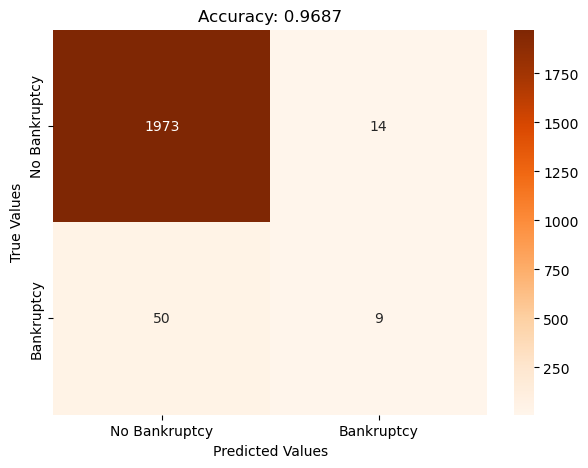



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.39      0.15      0.22        59

    accuracy                           0.97      2046
   macro avg       0.68      0.57      0.60      2046
weighted avg       0.96      0.97      0.96      2046



In [61]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9914**.
+ Score của tập Test là **0.9687**.

### 4.9 ANN <a class="anchor" id="4.9"></a>

In [62]:
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

2023-02-03 22:17:30.889643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [63]:
ANN_model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

ANN_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

2023-02-03 22:17:33.048995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [64]:
ANN_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
150/150 [==============================] - 0s 659us/step - loss: 0.3088 - accuracy: 0.9665
Epoch 2/200
150/150 [==============================] - 0s 636us/step - loss: 0.1639 - accuracy: 0.9663
Epoch 3/200
150/150 [==============================] - 0s 631us/step - loss: 0.1456 - accuracy: 0.9663
Epoch 4/200
150/150 [==============================] - 0s 636us/step - loss: 0.1432 - accuracy: 0.9663
Epoch 5/200
150/150 [==============================] - 0s 606us/step - loss: 0.1424 - accuracy: 0.9663
Epoch 6/200
150/150 [==============================] - 0s 590us/step - loss: 0.1419 - accuracy: 0.9663
Epoch 7/200
150/150 [==============================] - 0s 633us/step - loss: 0.1415 - accuracy: 0.9663
Epoch 8/200
150/150 [==============================] - 0s 662us/step - loss: 0.1410 - accuracy: 0.9663
Epoch 9/200
150/150 [==============================] - 0s 595us/step - loss: 0.1405 - accuracy: 0.9663
Epoch 10/200
150/150 [==============================] - 0s 653us/step - l

150/150 [==============================] - 0s 628us/step - loss: 0.1019 - accuracy: 0.9663
Epoch 80/200
150/150 [==============================] - 0s 579us/step - loss: 0.1025 - accuracy: 0.9663
Epoch 81/200
150/150 [==============================] - 0s 618us/step - loss: 0.1021 - accuracy: 0.9663
Epoch 82/200
150/150 [==============================] - 0s 595us/step - loss: 0.1022 - accuracy: 0.9663
Epoch 83/200
150/150 [==============================] - 0s 585us/step - loss: 0.1023 - accuracy: 0.9665
Epoch 84/200
150/150 [==============================] - 0s 614us/step - loss: 0.1023 - accuracy: 0.9656
Epoch 85/200
150/150 [==============================] - 0s 589us/step - loss: 0.1021 - accuracy: 0.9658
Epoch 86/200
150/150 [==============================] - 0s 556us/step - loss: 0.1019 - accuracy: 0.9656
Epoch 87/200
150/150 [==============================] - 0s 641us/step - loss: 0.1018 - accuracy: 0.9663
Epoch 88/200
150/150 [==============================] - 0s 580us/step - loss:

150/150 [==============================] - 0s 620us/step - loss: 0.1009 - accuracy: 0.9650
Epoch 158/200
150/150 [==============================] - 0s 579us/step - loss: 0.1007 - accuracy: 0.9650
Epoch 159/200
150/150 [==============================] - 0s 603us/step - loss: 0.1007 - accuracy: 0.9646
Epoch 160/200
150/150 [==============================] - 0s 578us/step - loss: 0.1003 - accuracy: 0.9650
Epoch 161/200
150/150 [==============================] - 0s 586us/step - loss: 0.1001 - accuracy: 0.9652
Epoch 162/200
150/150 [==============================] - 0s 637us/step - loss: 0.1003 - accuracy: 0.9654
Epoch 163/200
150/150 [==============================] - 0s 614us/step - loss: 0.1006 - accuracy: 0.9652
Epoch 164/200
150/150 [==============================] - 0s 579us/step - loss: 0.1006 - accuracy: 0.9652
Epoch 165/200
150/150 [==============================] - 0s 614us/step - loss: 0.1005 - accuracy: 0.9656
Epoch 166/200
150/150 [==============================] - 0s 611us/ste

### Predictions

In [65]:
def predict(model,x):
    pred  = ANN_model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,5))
#     cmap = sns.color_palette("viridis", as_cmap=True)
    sns.heatmap(cm,annot=True,fmt='g',cmap='Oranges',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))

**Train Predictions**

150/150 [==============================] - 0s 462us/step


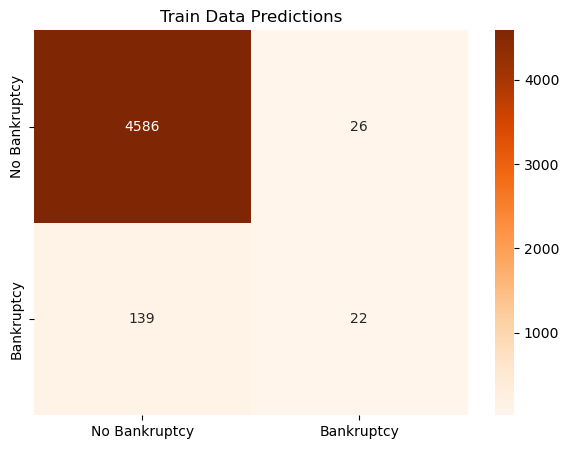



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4612
           1       0.46      0.14      0.21       161

    accuracy                           0.97      4773
   macro avg       0.71      0.57      0.60      4773
weighted avg       0.95      0.97      0.96      4773



In [66]:
y_train_pred = predict(ANN_model, X_train)
predict_graph(y_train, y_train_pred, 'Train Data Predictions')

**Test Predictions**

In [67]:
y_pred = predict(ANN_model, X_test)
acc9 = accuracy_score(y_test, y_pred)

64/64 [==============================] - 0s 445us/step


In [68]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.1186
Precision score: 0.3889
F1-Score: 0.1818
Accuracy score: 0.9692


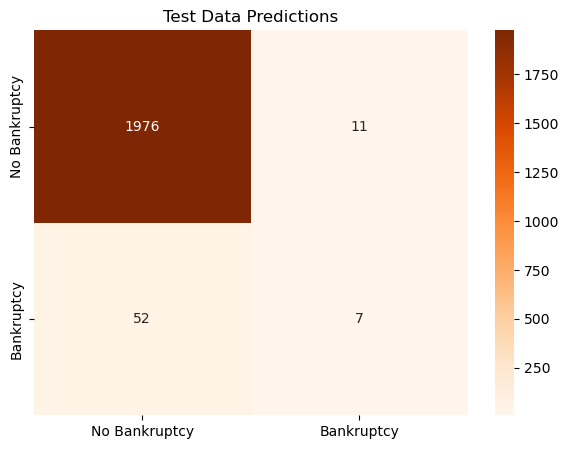



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1987
           1       0.39      0.12      0.18        59

    accuracy                           0.97      2046
   macro avg       0.68      0.56      0.58      2046
weighted avg       0.96      0.97      0.96      2046



In [69]:
predict_graph(y_test, y_pred, 'Test Data Predictions')

**Nhận xét:**
+ Score của tập Train là **0.97**.
+ Score của tập Test là **0.97**.

<a class="anchor" id="5"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">5. RESULT</p>

[**Table of Contents**](#0.1)

### Compare the accuracy of the models on the training set

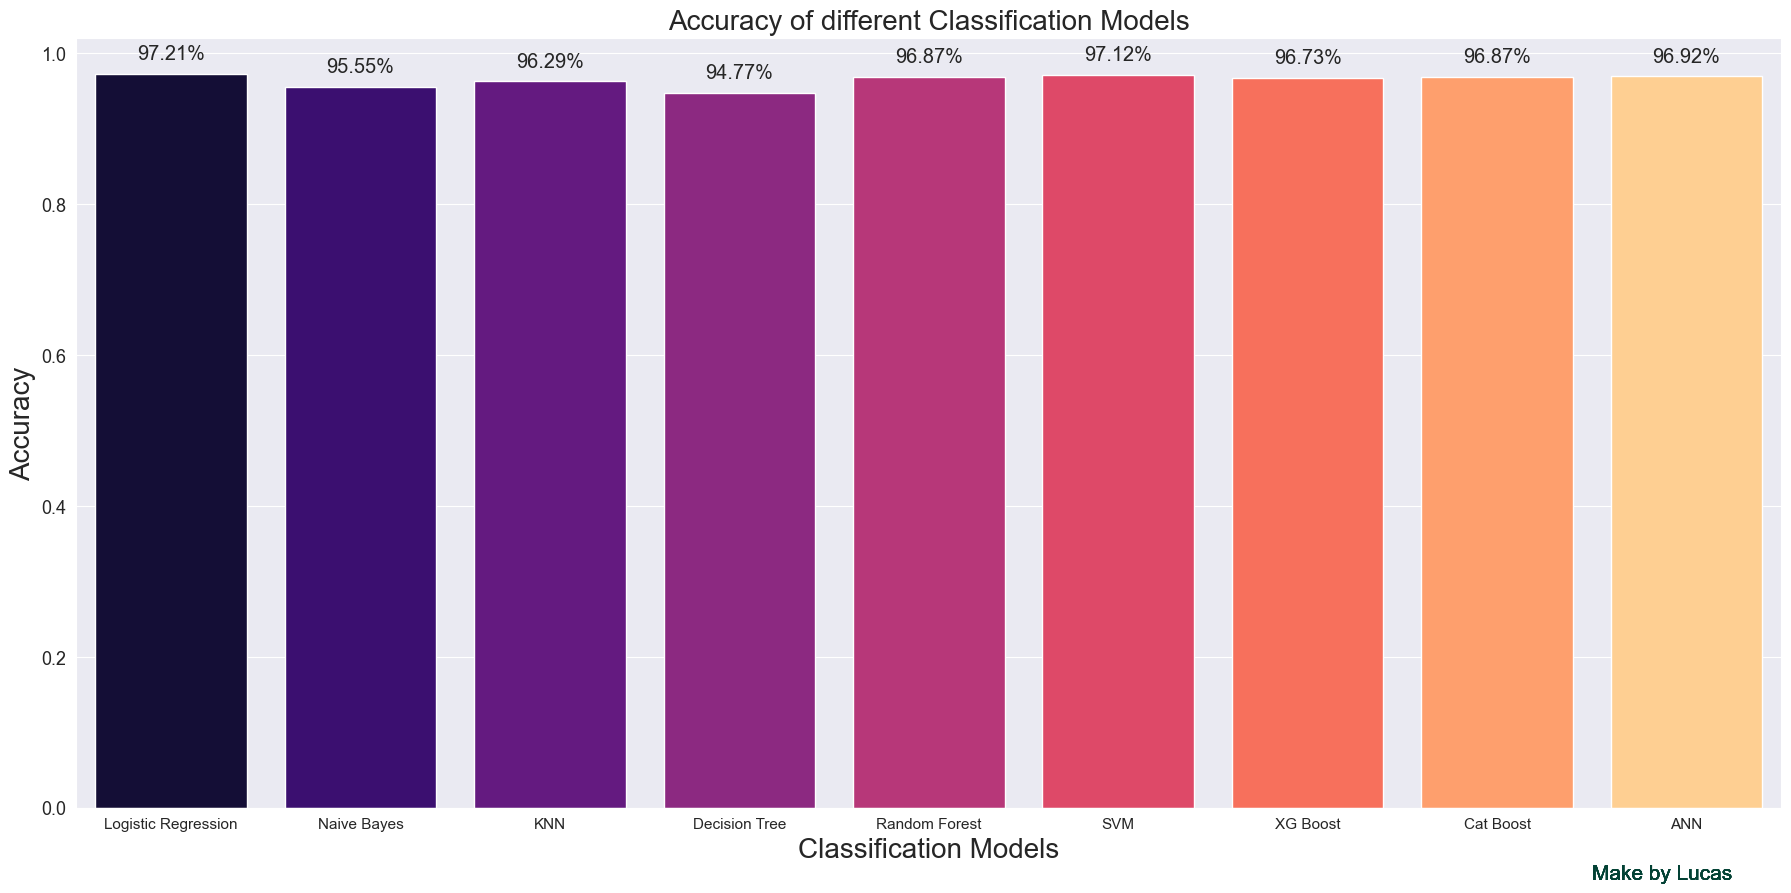

In [70]:
mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Decision Tree")
mylist.append(acc5)
mylist2.append("Random Forest")
mylist.append(acc6)
mylist2.append("SVM")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")
mylist.append(acc9)
mylist2.append("ANN")

plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "magma", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();

**Nhận xét:**
+ Các mô hình đều có Accuracy rất cao, đều trên 95%.
+ Tuy nhiên, mô hình có Accuracy **cao nhất** là **Logistic Regression** (**auc = 97,21%**).
+ Do đó, ta lựa chọn mô hình này để tiến hành dự báo.

### ROC Curve and Area Under the Curve

In [71]:
from sklearn.metrics import roc_curve, auc

**ROC - Logistic Regression**

In [72]:
y_pred_logistic = LR_model.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

**ROC - Naive Bayes**

In [73]:
y_pred_nb = NB_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

**ROC - KNN**

In [74]:
y_pred_knn = KNN_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

**ROC - Decision Tree**

In [75]:
y_pred_dtr = DTR_model.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

**ROC - Random Forest**

In [76]:
y_pred_rfc = RF_model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

**ROC - SVM**

In [77]:
y_pred_svm = SVM_model.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

**ROC - XG Boost**

In [78]:
y_pred_xgb = XGB_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

**ROC - CatBoost**

In [79]:
y_pred_catboost = catboost_model.predict_proba(X_test)[:,1]
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred_catboost)
auc_catboost = auc(catboost_fpr, catboost_tpr)

**ROC - ANN**

In [80]:
y_pred_ann = ANN_model.predict(X_test)
ann_fpr, ann_tpr, threshold = roc_curve(y_test, y_pred_ann)
auc_ann = auc(ann_fpr, ann_tpr)

64/64 [==============================] - 0s 447us/step


**ROC - Plotting Graph**

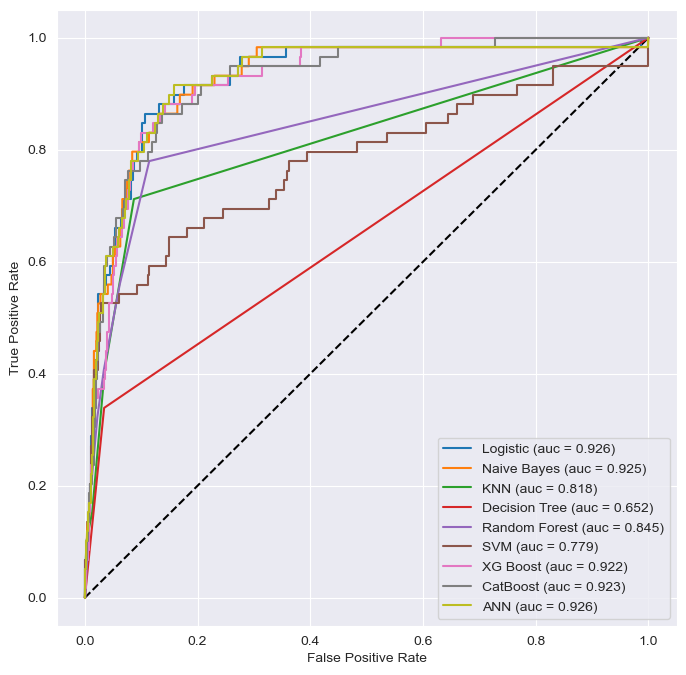

In [81]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.3f)' % auc_logistic)
# Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (auc = %0.3f)' % auc_nb)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.3f)' % auc_knn)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.3f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.3f)' % auc_rfc)
# SVM
plt.plot(svm_fpr, svm_tpr, label='SVM (auc = %0.3f)' % auc_svm)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.3f)' % auc_xgb)
# CatBoost
plt.plot(catboost_fpr, catboost_tpr, linestyle='-', label='CatBoost (auc = %0.3f)' % auc_catboost)
# ANN
plt.plot(ann_fpr, ann_tpr, label='ANN (auc = %0.3f)' % auc_ann)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

<a class="anchor" id="6"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">6. CONCLUSIONS</p>

[**Table of Contents**](#0.1)

Dự báo về vỡ nợ của công ty được sử dụng trong các lĩnh vực khác nhau trên toàn nền kinh tế. Các tập đoàn có thể chẩn đoán tình trạng hiện tại của họ dựa trên các mô hình dự đoán và thiết lập các chiến lược của họ. Các nhà điều hành có thể điều hành doanh nghiệp của họ ổn định hơn bằng cách quản lý các chỉ số chính ảnh hưởng đến rủi ro vỡ nợ của công ty. Các nhà đầu tư có thể sửa đổi chiến lược của họ và cải thiện danh mục đầu tư của họ bằng cách kiểm tra khả năng vỡ nợ của công ty. Ngoài ra, các chính phủ có thể thiết lập các chính sách an toàn vĩ mô và cải thiện các quy định tài chính liên quan bằng cách sử dụng các dự đoán vỡ nợ của công ty. Theo những cách này, các mô hình dự đoán vỡ nợ giúp thiết kế và cải thiện hệ thống tài chính. Ngoài ra, bằng cách sử dụng các thuật toán học máy và mô hình thống kê, các dự đoán vỡ nợ của công ty là ưu tiên hàng đầu của kỹ thuật tài chính tiên tiến. Cuộc khủng hoảng tài chính toàn cầu gần đây và sự gia tăng rủi ro tín dụng càng làm nổi bật tầm quan trọng của lĩnh vực này. Do tầm quan trọng của chúng, các dự đoán vỡ nợ của công ty đã được nghiên cứu rộng rãi.

Trong bài phân tích này, một số kết quả quan trọng được tìm thấy như sau:
+ Đề tài sử dụng các mô hình Machine Learning để đưa ra mô hình tốt nhất cho dự báo phá sản tại các công ty.
+ Mô hình tốt nhất đưa ra là **Logistic Regression Model**.
+ Độ chính xác của mô hình xây dựng được là **97,21%**. ROC rất cao (**auc = 92.6%**).
+ Ngoài ra, **top 10 features** có tác động lớn đến Bankruptcy gồm:
    + Continuous interest rate (after tax),
    + Persistent EPS in the Last Four Seasons
    + Per Share Net profit before tax (Yuan ¥)
    + Debt ratio %
    + Net worth/Assets
    + Borrowing dependency
    + Net profit before tax/Paid-in capital
    + Net Income to Total Assets
    + Net Income to Stockholder's Equity
    + Equity to Liability
    
Tóm lại, việc xây dựng mô hình để dự đoán rủi ro vỡ nợ (hay rủi ro phá sản) là rất quan trọng đối với mỗi doanh nghiệp. Do đó, khi thực hiện dự báo vỡ nợ doanh nghiệp, cần lựa chọn một phương pháp phù hợp để có thể cung cấp thông tin phù hợp cho mục đích dự báo, đòi hỏi phải hiểu cặn kẽ về cách sử dụng phù hợp của từng phương pháp.

**Hướng mở trong tương lai, có thể kết hợp thêm các model Machine Learning khác như `Gradient Boosted Tree`, `AdaBoost`, `Light GBM` để đưa ra model với độ chính xác cao hơn.**

**<span style="color:#034235;"> Thanks for reading this post. </span>**

_______
_Make by_**<span style="color:#034235;"> Lucas,</span>**
### <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">END</p>
______
<img src="https://github.com/LeHongNgoc3820/Lucas_viet_Blog/blob/b5e2de5a812292889e793b719572d06f3ababf2d/Logo%20ta%CC%81ch%20ne%CC%82%CC%80n.png?raw=true"
     style="width:200px;height:200px;">

**<span style="color:#034235;"> You can contact with me on:</span>**
+ **Gmail**: lehongngoc.work@gmail.com
+ **GitHub**: [LeHongNgoc3820](https://github.com/LeHongNgoc3820)
+ **Linkedln**: [Ngoc Le Hong](https://www.linkedin.com/in/ngoc-le-hong-44131b21a/)